In [14]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt

In [15]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
filepath = '/Users/rphinney/Documents/Hollings/MIROC-ESM_prmax5day_rcp85_2006_2100.nc'
data = Dataset(filepath)

In [17]:
print(data.variables.keys())

odict_keys(['time', 'time_bounds', 'lon', 'lon_bounds', 'lat', 'lat_bounds', 'prmax5day'])


In [18]:
print(data.variables['prmax5day'])

<class 'netCDF4._netCDF4.Variable'>
float32 prmax5day(time, lat, lon)
    _FillValue: 1e+20
    missing_value: 1e+20
    standard_name: precipitation_amount
    long_name: Annual maximum 5-day precipitation
    valid_min: 0.0
    cell_methods: time: sum
    units: mm
    valid_max: 4000.0
unlimited dimensions: time
current shape = (95, 490, 960)
filling on


In [19]:
lon = data.variables['lon'][:]
lat = data.variables['lat'][:]
prcp = .003937*(data.variables['prmax5day'][:])

In [20]:
data.close()

In [21]:
from mpl_toolkits.basemap import Basemap

In [22]:
lon_0 = lon.mean()
lat_0 = lat.mean()

m = Basemap(width = 5000000, height = 3500000, resolution = 'l', projection = 'stere', lat_ts = 40, lat_0=lat_0, lon_0=lon_0)

In [23]:
lons,lats = np.meshgrid(lon,lat)
x,y = m(lons,lats)

/Users/rphinney/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3342: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/rphinney/anaconda/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3381: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


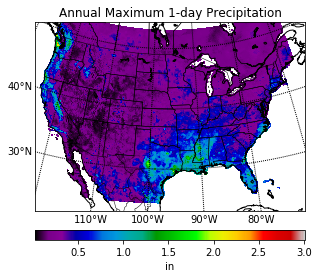

In [24]:
cs = m.pcolor(x,y, prcp[6][:][:], cmap = cm.spectral)

m.drawparallels(np.arange(-80.,81.,10.), labels = [1,0,0,0])
m.drawmeridians(np.arange(-180., 181., 10.), labels = [0,0,0,1])

m.drawcoastlines()
m.drawstates()
m.drawcountries()

cbar = m.colorbar(cs, location = 'bottom', pad = "10%")
cbar.set_label('in')

plt.title('Annual Maximum 1-day Precipitation')
plt.show()

[2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017 2018 2019 2020
 2021 2022 2023 2024 2025 2026 2027 2028 2029 2030 2031 2032 2033 2034 2035
 2036 2037 2038 2039 2040 2041 2042 2043 2044 2045 2046 2047 2048 2049 2050
 2051 2052 2053 2054 2055 2056 2057 2058 2059 2060 2061 2062 2063 2064 2065
 2066 2067 2068 2069 2070 2071 2072 2073 2074 2075 2076 2077 2078 2079 2080
 2081 2082 2083 2084 2085 2086 2087 2088 2089 2090 2091 2092 2093 2094 2095
 2096 2097 2098 2099 2100]


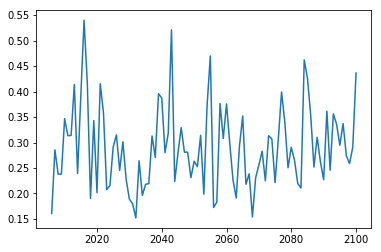

In [36]:
x = np.arange(2006,2101)
a = np.arange(0,95)
print(x)
plt.plot(x,prcp[a,400,120])
